<a href="https://colab.research.google.com/github/hectormelo/Machine-Learning-Techniques/blob/main/Taller_3/Taller_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


<img src="https://raw.githubusercontent.com/hectormelo/Machine-Learning-Techniques/main/Banner.png" ><br>
# Machine Learning Techniques - MISIS4219

Primer semestre - 2024

- Carlos Raúl de la Rosa Peredo
- Jhon Stewar Rayo Mosquera

*Uno de los fenómenos más grandes que se presentan hoy en día son las opiniones de los usuarios sobre diferentes temas a través de Internet. Esta opinión es muy valiosa ya que permite saber en tiempo real y de primera mano los sentimientos que tienen las personas sobre un producto o servicio.*

*Es por ello, que una cadena hotelera en Andalucía ha decidido extraer la información de las opiniones de sus usuarios que han publicado en internet. Con el fin de poder entender cuáles son las ideas principales de los usuarios acerca de sus servicios, qué aspectos resaltan ellos sobre su servicios y, lo más importante, saber en qué pueden mejorar. Además, con este banco de datos esperan poder entrenar un modelo que les permita automáticamente determinar el sentimiento del usuario basado en las nuevas opiniones que puedan dejar.*

*Para poder tomar decisiones en este estudio, se debe presentar:*

* *Un análisis de las palabras más importantes en cada una de las categorías que le den relevancia a la cadena hotelera.*

* *Un proceso de limpieza y transformación de datos idóneo para el entrenamiento de los algoritmos.*

* *Una tabla comparativa, mostrando el rendimiento los dos mejores modelos entrenados con Naïve Bayes y KNN.*

* *A partir de la tabla comparativa, ¿cuál modelo ofrece el mejor rendimiento sobre el conjunto test? ¿Qué interpretación puedes darles a los valores obtenidos sobre las métricas de rendimiento?*


_**Datos**_: *Big_AHR.csv*

## Diccionario de Datos

*Se dan a disposición 13330 reviews de los usuarios los caules están compuestos de la siguiente forma:*

* **Review’s title**: *Título del review dado por el usuario.*
* **5-scale rating**: *Calificación del usuario. Escala de 1 a 5.*
* **Text**: Review del usuario.
* **City_Region**: *Región donde pertenece el hotel.*
* **Hotel’s name**: *Nombre del hotel evaluado.*
* **Binary sentiment label** *Clasificación sentimental. Donde 0 es Negativo, 1 es Positivo y 3 es Neutral.*

Este es un modelo base, en este caso se realizó la predicción sobre el rating que podría dar un usuario.

## 0. Importación de Librerías.

In [133]:
!pip install ydata-profiling
!pip install contractions
import nltk
nltk.download('all')

Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable


[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to /home/raul/nltk_data...
[nltk_data]    |   Package abc is already up-to-date!
[nltk_data]    | Downloading package alpino to /home/raul/nltk_data...
[nltk_data]    |   Package alpino is already up-to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger to
[nltk_data]    |     /home/raul/nltk_data...
[nltk_data]    |   Package averaged_perceptron_tagger is already up-
[nltk_data]    |       to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger_ru to
[nltk_data]    |     /home/raul/nltk_data...
[nltk_data]    |   Package averaged_perceptron_tagger_ru is already
[nltk_data]    |       up-to-date!
[nltk_data]    | Downloading package basque_grammars to
[nltk_data]    |     /home/raul/nltk_data...
[nltk_data]    |   Package basque_grammars is already up-to-date!
[nltk_data]    | Downloading package bcp47 to /home/raul/nltk_data...
[nltk_data]    |   Pack

True

In [134]:
#Manejo de datos
import pandas as pd

#Visualización de datos
import matplotlib.pyplot as plt
import seaborn as sns

#Analisis de datos
from ydata_profiling import ProfileReport

#Procesamiento de lenguaje natural
from nltk.corpus import stopwords

#Entrenamiento del modelo
from sklearn.model_selection import train_test_split

from sklearn.feature_extraction.text import TfidfVectorizer # Vectorización de texto
from sklearn.preprocessing import StandardScaler, FunctionTransformer # Escalamiento de datos
from sklearn.decomposition import PCA # Análisis de componentes principales
from sklearn.pipeline import Pipeline

from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import HistGradientBoostingClassifier
from sklearn.linear_model import LogisticRegression


from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay # Matriz de confusión
from sklearn.metrics import classification_report, accuracy_score # Reporte de clasificación y precisión


# Librería para la creación de nube de etiquetas -Wordcloud.
from wordcloud import WordCloud

In [135]:
## Definición de las palabras que no se deben tener en cuenta para el análisis.

stop_words = stopwords.words('spanish')
stop_words += ['hotel','you', 'want','to','08', '19', '18']

## 1. Carga y entendimiento de los datos

In [136]:
# URL del archivo CSV en el repositorio de GitHub
url = 'https://media.githubusercontent.com/media/oyar99/ISIS4219/main/Taller3/Big_AHR.csv'

# Cargar los datos en un dataframe
data = pd.read_csv(url)
data['text'] = data['title'] + ' ' + data['review_text']

# Visualizar los primeros registros de datos para darnos una idea de como estan estructurados
data.head()

Unnamed: 0                        title  rating  \
0           0  Excelente y personal amable       5   
1           1                     Céntrico       4   
2           2            Hotel excepcional       5   
3           3                        WOW!!       5   
4           4                    Magnifico       5   

                                         review_text  \
0  Un hotel muy bueno.  El personal fue muy amabl...   
1  Muy buen hotel al nivel de lo esperado, habita...   
2  Magnífico hotel. La verdad es que todo perfect...   
3  Hotel hermoso, buen diseño, original, limpio. ...   
4  Magnífica ubicación en pleno centro de Sevilla...   

                                location                 hotel  label  \
0  Seville_Province_of_Seville_Andalucia  H10_Casa_de_la_Plata      1   
1  Seville_Province_of_Seville_Andalucia  H10_Casa_de_la_Plata      1   
2  Seville_Province_of_Seville_Andalucia  H10_Casa_de_la_Plata      1   
3  Seville_Province_of_Seville_Andalucia  H10_Casa_de_la_Plata      1   
4  Seville_Province_of_Seville_Andalucia  H10_Casa_de_la_Plata      1   

                                                text  
0  Excelente y personal amable Un hotel muy bueno...  
1  Céntrico Muy buen hotel al nivel de lo esperad...  
2  Hotel excepcional Magnífico hotel. La verdad e...  
3  WOW!! Hotel hermoso, buen diseño, original, li...  
4  Magnifico Magnífica ubicación en pleno centro ...

Ahora dividimos nuestros datos en dos conjuntos: training y test

In [137]:
#Partimos el conjunto de datos en un conjunto de entrenamiento y otro de test
train, test = train_test_split(data, test_size=0.2, random_state=42)
train.head()

Unnamed: 0                                     title  rating  \
1297         1297                               Excepcional       5   
10952       10952       Inmejorable relación calidad precio       5   
8145         8145                                     UN 10       5   
553           553  Hotel muy elegante y servicio muy atento       5   
9960         9960                            Máximo confort       5   

                                             review_text  \
1297   Hemos pasado un fin de semana en el hotel Eme ...   
10952  Hotel con pocas habitaciones pero de una calid...   
8145   He estado alojado este puente con unos amigos ...   
553    Fue una experiencia fantástica.  No faltaba de...   
9960   Este hotel se encuentra muy bien ubicado,a 10 ...   

                                    location  \
1297   Seville_Province_of_Seville_Andalucia   
10952  Cordoba_Province_of_Cordoba_Andalucia   
8145   Granada_Province_of_Granada_Andalucia   
553    Seville_Province_of_Seville_Andalucia   
9960   Cordoba_Province_of_Cordoba_Andalucia   

                                                   hotel  label  \
1297                           EME_Catedral_Mercer_Hotel      1   
10952                                    Hotel_Don_Paula      1   
8145                                   Carmen_de_Ramilla      1   
553    Hotel_Colon_Gran_Melia_The_Leading_hotel_of_th...      1   
9960                                          Hotel_Selu      1   

                                                    text  
1297   Excepcional Hemos pasado un fin de semana en e...  
10952  Inmejorable relación calidad precio Hotel con ...  
8145   UN 10 He estado alojado este puente con unos a...  
553    Hotel muy elegante y servicio muy atento Fue u...  
9960   Máximo confort Este hotel se encuentra muy bie...

In [138]:
# Dimensionalidad de los datos de entrenamiento
train.shape

(14537, 8)

In [139]:
# Dimensionalidad de los datos de prueba
test.shape

(3635, 8)

Luego, de tener una idea basica de los datos. Separamos las caracteristicas de la variable que deseamos predecir

In [140]:
y_target = 'label'

In [141]:
train_x, train_y = train.drop(y_target, axis=1), train[y_target]
train_x.head()

Unnamed: 0                                     title  rating  \
1297         1297                               Excepcional       5   
10952       10952       Inmejorable relación calidad precio       5   
8145         8145                                     UN 10       5   
553           553  Hotel muy elegante y servicio muy atento       5   
9960         9960                            Máximo confort       5   

                                             review_text  \
1297   Hemos pasado un fin de semana en el hotel Eme ...   
10952  Hotel con pocas habitaciones pero de una calid...   
8145   He estado alojado este puente con unos amigos ...   
553    Fue una experiencia fantástica.  No faltaba de...   
9960   Este hotel se encuentra muy bien ubicado,a 10 ...   

                                    location  \
1297   Seville_Province_of_Seville_Andalucia   
10952  Cordoba_Province_of_Cordoba_Andalucia   
8145   Granada_Province_of_Granada_Andalucia   
553    Seville_Province_of_Seville_Andalucia   
9960   Cordoba_Province_of_Cordoba_Andalucia   

                                                   hotel  \
1297                           EME_Catedral_Mercer_Hotel   
10952                                    Hotel_Don_Paula   
8145                                   Carmen_de_Ramilla   
553    Hotel_Colon_Gran_Melia_The_Leading_hotel_of_th...   
9960                                          Hotel_Selu   

                                                    text  
1297   Excepcional Hemos pasado un fin de semana en e...  
10952  Inmejorable relación calidad precio Hotel con ...  
8145   UN 10 He estado alojado este puente con unos a...  
553    Hotel muy elegante y servicio muy atento Fue u...  
9960   Máximo confort Este hotel se encuentra muy bie...

In [142]:
test_x, test_y = test.drop(y_target, axis=1), test[y_target]
test_x.head()

Unnamed: 0                                     title  rating  \
7317         7317                             Decepcionados       1   
17227       17227                      no podemos pedir mas       3   
4822         4822               Recomendable para una noche       3   
970           970  Lugar exquisito en el corazon de Sevilla       5   
4193         4193                                Un acierto       5   

                                             review_text  \
7317   Hace unos años nos alojamiento bastantes veces...   
17227  para el precio k cuesta el todo incluido no po...   
4822   Centrico, comodo, pésima ducha, falta de corti...   
970    Hermoso Hotel Boutique, en una inmejorable ubi...   
4193   Ubicación fenomenal para moverte hacia el cent...   

                                                location  \
7317               Granada_Province_of_Granada_Andalucia   
17227                                                NaN   
4822   Malaga_Costa_del_Sol_Province_of_Malaga_Andalucia   
970                Seville_Province_of_Seville_Andalucia   
4193   Malaga_Costa_del_Sol_Province_of_Malaga_Andalucia   

                                   hotel  \
7317                Abades_Nevada_Palace   
17227                                NaN   
4822   Apartamentos_Marques_de_la_Merced   
970                  Hotel_Casa_de_Colon   
4193    Hotel_Soho_Boutique_Bahia_Malaga   

                                                    text  
7317   Decepcionados Hace unos años nos alojamiento b...  
17227  no podemos pedir mas para el precio k cuesta e...  
4822   Recomendable para una noche Centrico, comodo, ...  
970    Lugar exquisito en el corazon de Sevilla Hermo...  
4193   Un acierto Ubicación fenomenal para moverte ha...

<Axes: xlabel='label'>

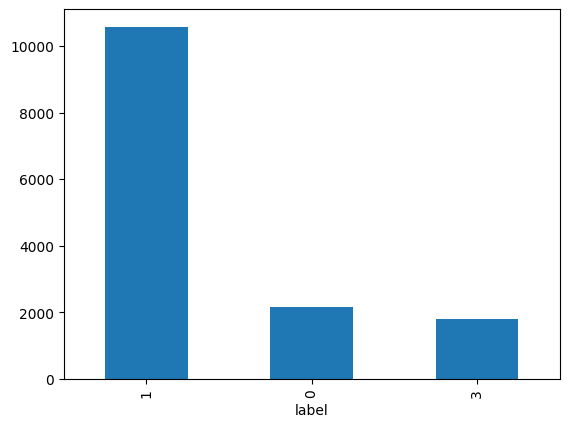

In [143]:
# Observamos la distribucón de clases en el conjunto de datos de entrenamiento
train_y.value_counts().plot(kind='bar')

<Axes: xlabel='label'>

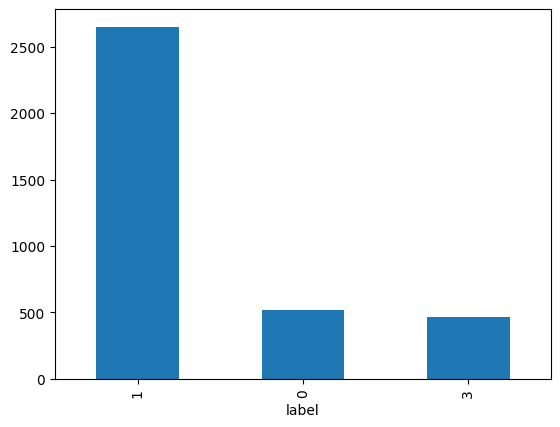

In [144]:
# Observamos la distribucion de clases en el conjunto de datos de prueba
test_y.value_counts().plot(kind='bar')

Los datos no parecen tener una distribucion balanceada, y existen mas datos dondes los usuarios se sienten positivos frente a su experiencia en los hoteles.

Ahora procederemos a hacer un analisis mas completo de los datos usando `ProfileReport`

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

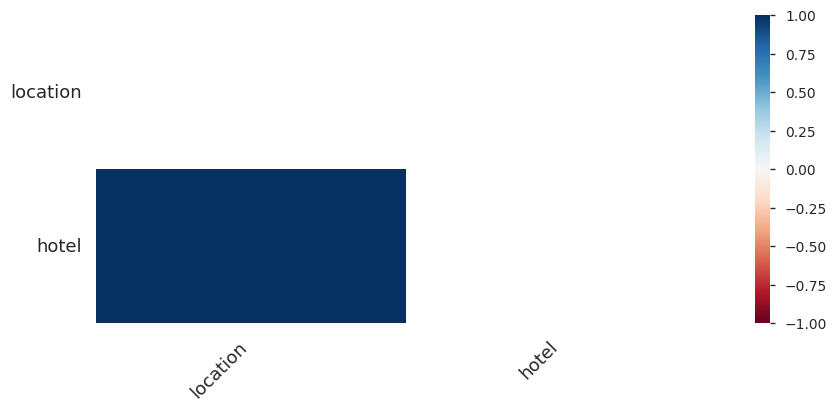

In [145]:
ProfileReport(train)

Observamos que en las caracteristicas `title` y `reviewtext` existen palabras que no aportan mucha informacion como `y`, `en`, `de`, `la`, por lo que podemos usar librerias para omitir estas palabras, tambien denominadas `stopwords`. Se identificaron tambien otras palabras que no aportan informacion en el contexto del problema que estamos trabajando, como por ejemplo `hotel`.

In [146]:
def plot_word_cloud(texts,stopwords=[]):
    words = ''

    for text in texts:
        # cast each line of text
        text = str(text)
        # split the text into tokens - words
        tokens = text.split()

        # Converts each token into lowercase
        for i in range(len(tokens)):
            tokens[i] = tokens[i].lower()

        words += " ".join(tokens)+" "

    wordcloud = WordCloud(width=800,
                          height =800,
                          background_color='white',
                          stopwords=stopwords,
                          min_font_size = 10
                ).generate(words)

    # plot the WordCloud image
    plt.figure(figsize = (8, 8), facecolor = None)
    plt.imshow(wordcloud)
    plt.axis("off")
    plt.tight_layout(pad = 0)

    plt.show()

In [147]:
# Mapear la clase a una variable descriptiva para entender mejor los datos
map_class_to_text = {
    0: "Negativo",
    1: "Positivo",
    3: "Neutral"
}

---------- Feature: title ----------

---------- Words for class: Positivo ----------


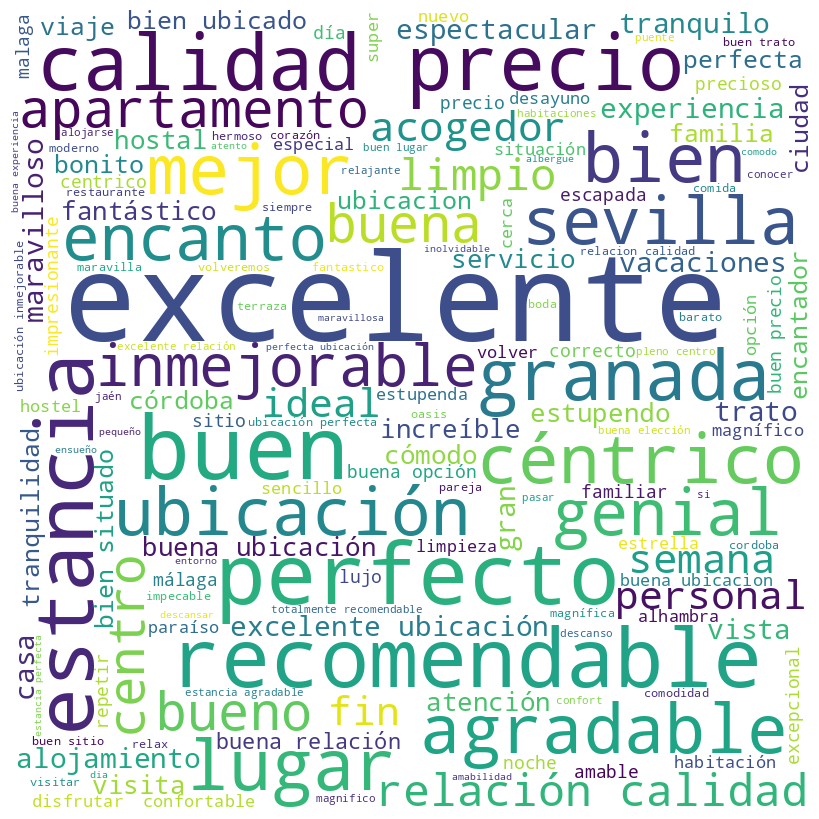



---------- Words for class: Negativo ----------


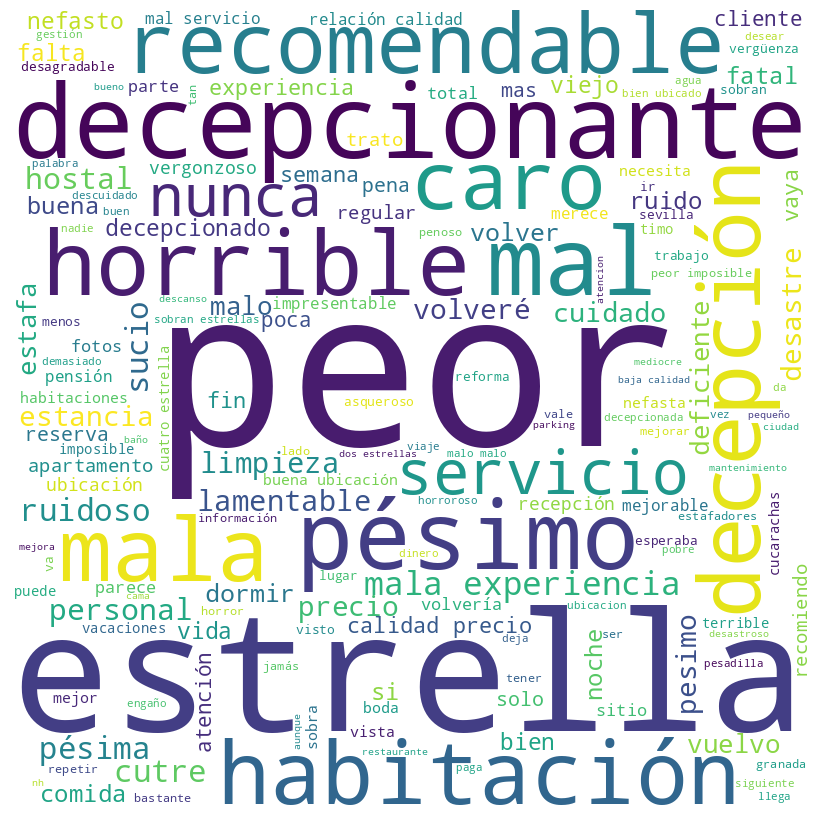



---------- Words for class: Neutral ----------


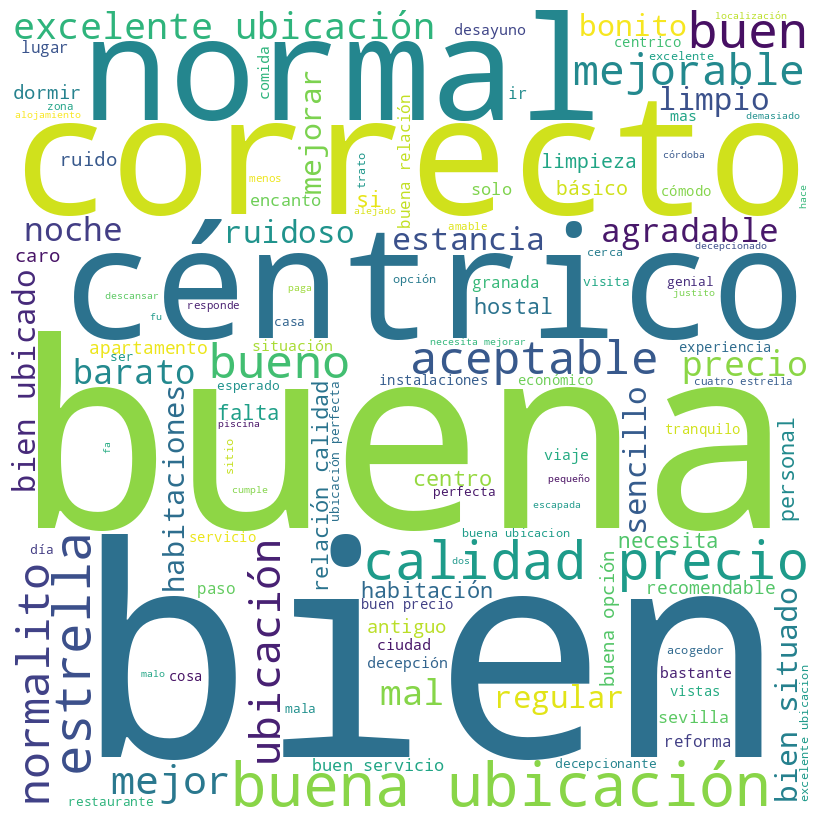



---------- Feature: review_text ----------

---------- Words for class: Positivo ----------


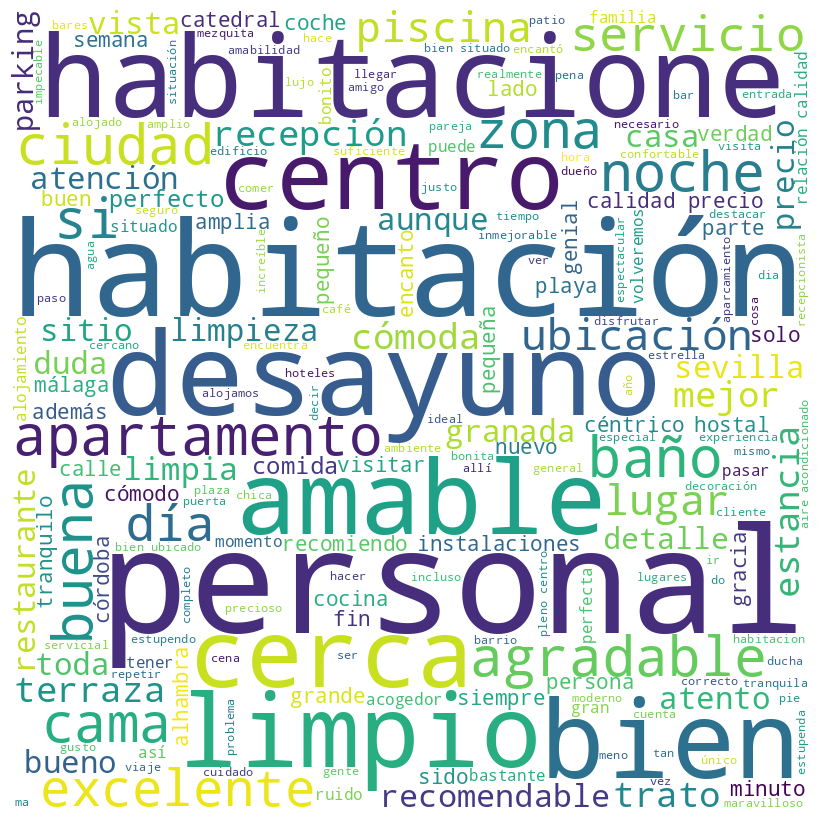



---------- Words for class: Negativo ----------


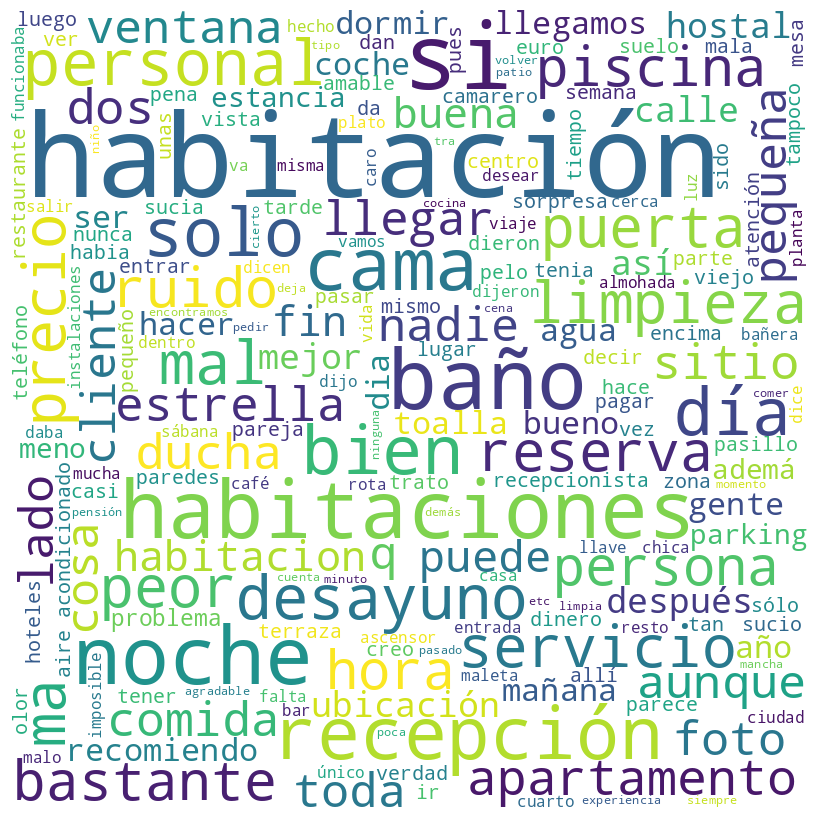



---------- Words for class: Neutral ----------


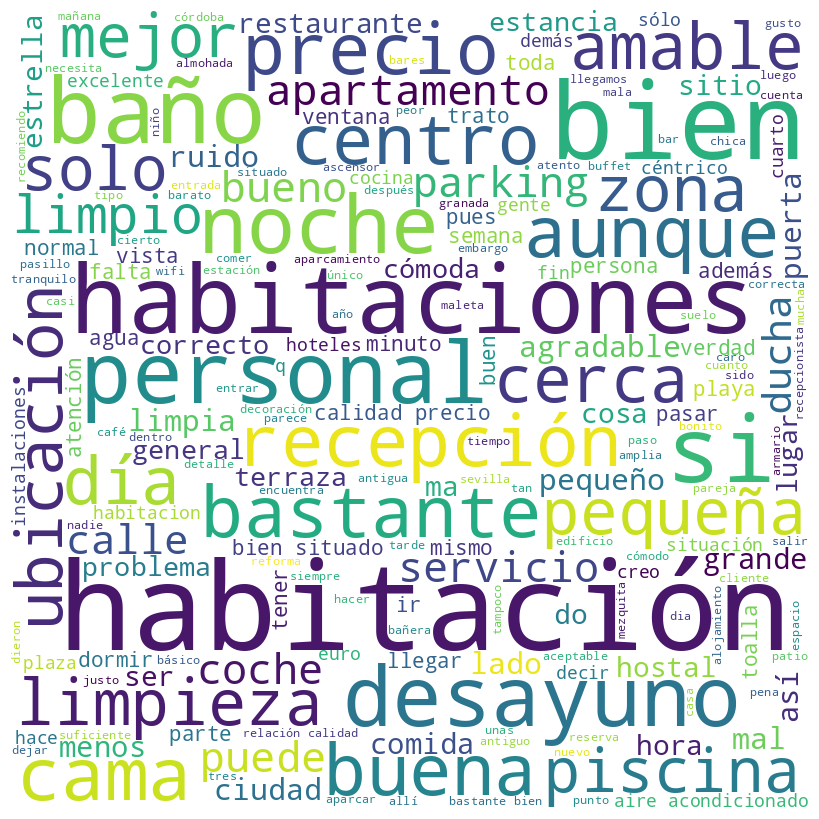

In [148]:
for feature in ['title', 'review_text']:
  print(f'---------- Feature: {feature} ----------\n')
  for _class in train_y.unique():
      print(f'---------- Words for class: {map_class_to_text[_class]} ----------')
      plot_word_cloud(train.loc[train['label']==_class, feature], stopwords=stop_words)
      print('\n')

Podemos observar que en los usuarios que tuvieron una experiencia positiva destacan palabras como `recomendable`, `excelente`, `agradable`. En aquellos que tuvieron una mala experiencia observamos palabras como `peor`, `decepcionante`, `pesimo`. Y en aquellos que tuvieron una experiencia neutra tenemos palabras como `buena`, `bien`, `normal`. Estas palabras aparecen mas en el titulo de los reviews que en la descripcion en si. En la descripcion destacan palabras mas comunes entre todas las clases como `desayuno`, `habitacion`, `personal`, por lo que nos podemos dar una idea que parte de la informacion que queremos usar esta en su mayoria en el titulo.

Previamente tambien identificamos que existe alta correlacion entre algunas variables del conjunto de datos, por lo que decidimos crear una matriz de correlacion oara rating y la clase transformando la clase para que exista una relacion lineal y pearson pueda identificar la correlacion.

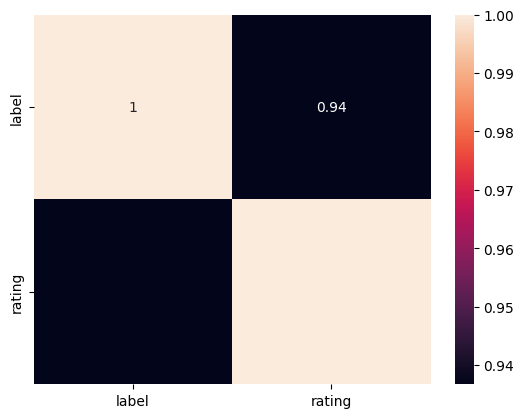

In [149]:
train_rating_label = pd.concat([train['label'].map({ 0: 0, 3: 3, 1: 5 }), train['rating']], axis=1)
correlation_matrix= train_rating_label.corr()
sns.heatmap(correlation_matrix, annot=True)
plt.show()

## 2. Preparacion de los datos

Primero procedemos a dejar las caracteristicas mas importantes a partir del entenedimiento de los datos

In [150]:
# Quitar primera columna que consiste en el numero del registro.
train_x = train_x.drop(columns='Unnamed: 0')
train_x.head()

title  rating  \
1297                                Excepcional       5   
10952       Inmejorable relación calidad precio       5   
8145                                      UN 10       5   
553    Hotel muy elegante y servicio muy atento       5   
9960                             Máximo confort       5   

                                             review_text  \
1297   Hemos pasado un fin de semana en el hotel Eme ...   
10952  Hotel con pocas habitaciones pero de una calid...   
8145   He estado alojado este puente con unos amigos ...   
553    Fue una experiencia fantástica.  No faltaba de...   
9960   Este hotel se encuentra muy bien ubicado,a 10 ...   

                                    location  \
1297   Seville_Province_of_Seville_Andalucia   
10952  Cordoba_Province_of_Cordoba_Andalucia   
8145   Granada_Province_of_Granada_Andalucia   
553    Seville_Province_of_Seville_Andalucia   
9960   Cordoba_Province_of_Cordoba_Andalucia   

                                                   hotel  \
1297                           EME_Catedral_Mercer_Hotel   
10952                                    Hotel_Don_Paula   
8145                                   Carmen_de_Ramilla   
553    Hotel_Colon_Gran_Melia_The_Leading_hotel_of_th...   
9960                                          Hotel_Selu   

                                                    text  
1297   Excepcional Hemos pasado un fin de semana en e...  
10952  Inmejorable relación calidad precio Hotel con ...  
8145   UN 10 He estado alojado este puente con unos a...  
553    Hotel muy elegante y servicio muy atento Fue u...  
9960   Máximo confort Este hotel se encuentra muy bie...

In [151]:
# Quitar primera columna que consiste en el numero del registro.
test_x = test_x.drop(columns='Unnamed: 0')
test_x.head()

title  rating  \
7317                              Decepcionados       1   
17227                      no podemos pedir mas       3   
4822                Recomendable para una noche       3   
970    Lugar exquisito en el corazon de Sevilla       5   
4193                                 Un acierto       5   

                                             review_text  \
7317   Hace unos años nos alojamiento bastantes veces...   
17227  para el precio k cuesta el todo incluido no po...   
4822   Centrico, comodo, pésima ducha, falta de corti...   
970    Hermoso Hotel Boutique, en una inmejorable ubi...   
4193   Ubicación fenomenal para moverte hacia el cent...   

                                                location  \
7317               Granada_Province_of_Granada_Andalucia   
17227                                                NaN   
4822   Malaga_Costa_del_Sol_Province_of_Malaga_Andalucia   
970                Seville_Province_of_Seville_Andalucia   
4193   Malaga_Costa_del_Sol_Province_of_Malaga_Andalucia   

                                   hotel  \
7317                Abades_Nevada_Palace   
17227                                NaN   
4822   Apartamentos_Marques_de_la_Merced   
970                  Hotel_Casa_de_Colon   
4193    Hotel_Soho_Boutique_Bahia_Malaga   

                                                    text  
7317   Decepcionados Hace unos años nos alojamiento b...  
17227  no podemos pedir mas para el precio k cuesta e...  
4822   Recomendable para una noche Centrico, comodo, ...  
970    Lugar exquisito en el corazon de Sevilla Hermo...  
4193   Un acierto Ubicación fenomenal para moverte ha...

### Preprocesamiento para generar los 'embeddings' con los que se entrenará el modelo

In [166]:
# Definir el transformador que convierte la salida del TF-IDF Vectorizer a un array denso
to_dense = FunctionTransformer(lambda x: x.toarray(), accept_sparse=True)

# Crear el pipeline
pipeline = Pipeline([
    ('tfidf', TfidfVectorizer(stop_words=stop_words, max_features=2500, strip_accents='ascii',
                             ngram_range=(1, 1)
                             )
    ),
    ('to_dense', to_dense),
    ('scaler', StandardScaler()),
    ('pca', PCA(0.95))
])

# Ajustar el pipeline con los datos de entrenamiento
# Suponiendo que train_x es un DataFrame y 'title' es la columna con el texto a procesar
pipeline.fit(train_x['text'])

/home/raul/.local/lib/python3.10/site-packages/sklearn/feature_extraction/text.py:408: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['eramos', 'estabamos', 'estais', 'estan', 'estara', 'estaran', 'estaras', 'estare', 'estareis', 'estaria', 'estariais', 'estariamos', 'estarian', 'estarias', 'esteis', 'esten', 'estes', 'estuvieramos', 'estuviesemos', 'fueramos', 'fuesemos', 'habeis', 'habia', 'habiais', 'habiamos', 'habian', 'habias', 'habra', 'habran', 'habras', 'habre', 'habreis', 'habria', 'habriais', 'habriamos', 'habrian', 'habrias', 'hayais', 'hubieramos', 'hubiesemos', 'mas', 'mia', 'mias', 'mio', 'mios', 'seais', 'sera', 'seran', 'seras', 'sere', 'sereis', 'seria', 'seriais', 'seriamos', 'serian', 'serias', 'si', 'tambien', 'tendra', 'tendran', 'tendras', 'tendre', 'tendreis', 'tendria', 'tendriais', 'tendriamos', 'tendrian', 'tendrias', 'teneis', 'tengais', 'tenia', 'teniais', 'teniamos', 'tenian', 'tenias',

Pipeline(steps=[('tfidf',
                 TfidfVectorizer(max_features=2500,
                                 stop_words=['de', 'la', 'que', 'el', 'en', 'y',
                                             'a', 'los', 'del', 'se', 'las',
                                             'por', 'un', 'para', 'con', 'no',
                                             'una', 'su', 'al', 'lo', 'como',
                                             'más', 'pero', 'sus', 'le', 'ya',
                                             'o', 'este', 'sí', 'porque', ...],
                                 strip_accents='ascii')),
                ('to_dense',
                 FunctionTransformer(accept_sparse=True,
                                     func=<function <lambda> at 0x7fa084725cf0>)),
                ('scaler', StandardScaler()), ('pca', PCA(n_components=0.95))])

In [167]:
x_train = pipeline.transform(train_x['text'])
x_test = pipeline.transform(test_x['text'])

### Métricas a vencer

## Naive Bayes

In [168]:
gnb = GaussianNB()

In [169]:
y_pred = gnb.fit(x_train, train_y).predict(x_test)

Naive Bayes: 0.5405777166437414

Naive Bayes:
              precision    recall  f1-score   support

           0       0.35      0.70      0.46       517
           1       0.88      0.54      0.67      2649
           3       0.18      0.37      0.24       469

    accuracy                           0.54      3635
   macro avg       0.47      0.54      0.46      3635
weighted avg       0.72      0.54      0.58      3635


Naive Bayes:


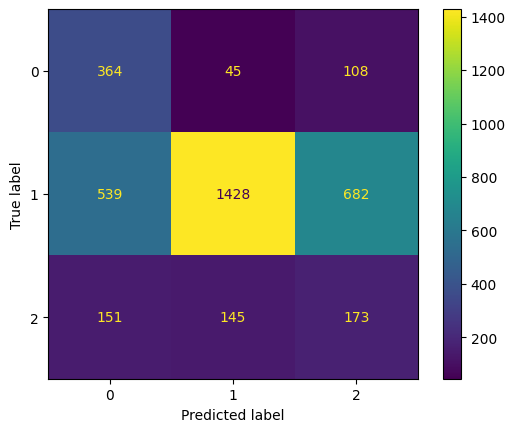

In [170]:
# Precisión
print("Naive Bayes:", accuracy_score(test_y, y_pred))

# Informe de clasificación
print("\nNaive Bayes:")
print(classification_report(test_y, y_pred))

# Matriz de confusión
print("\nNaive Bayes:")
cm_rf = confusion_matrix(test_y, y_pred)
disp_rf = ConfusionMatrixDisplay(confusion_matrix=cm_rf)
disp_rf.plot()
plt.show()

## KNN

In [171]:
neigh = KNeighborsClassifier(n_neighbors=3, weights='distance')

In [172]:
y_pred = neigh.fit(x_train, train_y).predict(x_test)


KNN:
              precision    recall  f1-score   support

           0       1.00      0.35      0.51       517
           1       0.81      1.00      0.89      2649
           3       0.98      0.36      0.52       469

    accuracy                           0.82      3635
   macro avg       0.93      0.57      0.64      3635
weighted avg       0.86      0.82      0.79      3635


KNN:


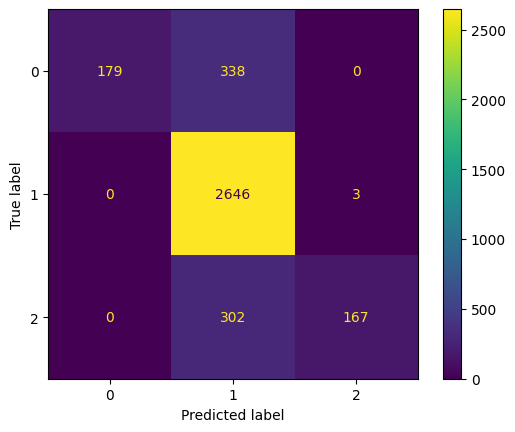

In [173]:
# Informe de clasificación
print("\nKNN:")
print(classification_report(test_y, y_pred))

# Matriz de confusión
print("\nKNN:")
cm_rf = confusion_matrix(test_y, y_pred)
disp_rf = ConfusionMatrixDisplay(confusion_matrix=cm_rf)
disp_rf.plot()
plt.show()

## Hist GBC

In [174]:
hgbc = HistGradientBoostingClassifier(random_state=0, min_samples_leaf=50,
                                      max_iter=500, max_depth=15
                                      )

In [175]:
y_pred = hgbc.fit(x_train, train_y).predict(x_test)


GBC:
              precision    recall  f1-score   support

           0       0.82      0.87      0.85       517
           1       0.93      0.97      0.95      2649
           3       0.77      0.51      0.61       469

    accuracy                           0.90      3635
   macro avg       0.84      0.79      0.80      3635
weighted avg       0.89      0.90      0.89      3635


GBC:


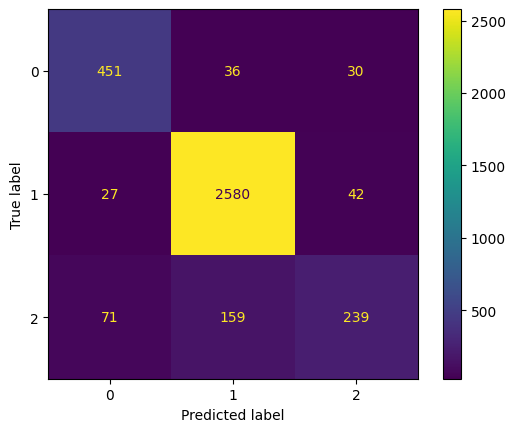

In [176]:
# Informe de clasificación
print("\nGBC:")
print(classification_report(test_y, y_pred))

# Matriz de confusión
print("\nGBC:")
cm_rf = confusion_matrix(test_y, y_pred)
disp_rf = ConfusionMatrixDisplay(confusion_matrix=cm_rf)
disp_rf.plot()
plt.show()

## Logistic Regression

In [177]:
log_reg = LogisticRegression(class_weight='balanced')

In [178]:
y_pred = log_reg.fit(x_train, train_y).predict(x_test)


logReg:
              precision    recall  f1-score   support

           0       0.79      0.79      0.79       517
           1       0.94      0.92      0.93      2649
           3       0.54      0.58      0.56       469

    accuracy                           0.86      3635
   macro avg       0.75      0.77      0.76      3635
weighted avg       0.87      0.86      0.86      3635


logReg:


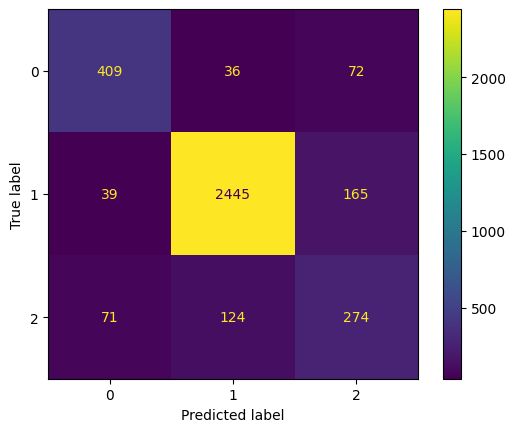

In [179]:
# Informe de clasificación
print("\nlogReg:")
print(classification_report(test_y, y_pred))

# Matriz de confusión
print("\nlogReg:")
cm_rf = confusion_matrix(test_y, y_pred)
disp_rf = ConfusionMatrixDisplay(confusion_matrix=cm_rf)
disp_rf.plot()
plt.show()